In [94]:
import keras
# IMDB 리뷰 데이터셋
(train_input, train_target), (test_input, test_target) =\
    keras.datasets.imdb.load_data(num_words=200)

In [95]:
print(train_input.shape, test_input.shape)

(25000,) (25000,)


In [96]:
print(len(train_input[0]), len(train_input[1]), len(train_input[2]))

218 189 141


In [97]:
train_target[:10]

array([1, 0, 0, 1, 0, 0, 1, 0, 1, 0])

In [98]:
# 훈련세트, 검증세트
from sklearn.model_selection import train_test_split

train_input, val_input, train_target, val_target = train_test_split(
    train_input, train_target, test_size=0.2, random_state=42
)

In [99]:
# 단어 갯수의 분포로 가장 많이 분포가 되어 있는 단어 갯수를 파악
import numpy as np
lengths = np.array([len(x) for x in train_input])
print(f"평균:{np.mean(lengths)}, 중앙값:{np.median(lengths)}, 최대:{np.max(lengths)}, 최소:{np.min(lengths)}")

평균:239.00925, 중앙값:178.0, 최대:1854, 최소:11


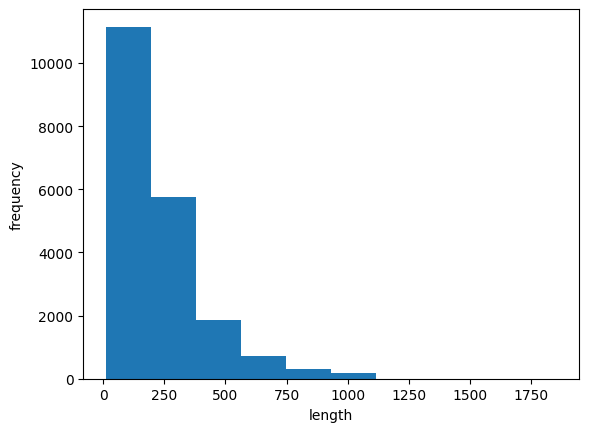

In [100]:
import matplotlib.pyplot as plt

plt.hist(lengths) # 히스토그램 그리기 : 수치의 빈도를 가지고 그래프를 그릴 때
plt.xlabel('length')
plt.ylabel('frequency')
plt.show()

In [101]:
# 패딩 처리 - 학습 입력 데이터는 갯수가 동일!, 문장은 갯수가 동일하지 않다 - 동일하게 일정 갯수만큼 자른다.
# 어떤 문장은 기준보다 작을 수 있으므로 0으로 채워서 길이를 맞춰준다.

from keras.preprocessing.sequence import pad_sequences

In [102]:
train_seq = pad_sequences(train_input, maxlen=100)
val_seq = pad_sequences(val_input, maxlen=100)

In [103]:
print(train_seq.shape, val_seq.shape)

(20000, 100) (5000, 100)


In [104]:
print(train_seq[0])
print (train_seq[0][:10])

[ 10   4  20   9   2   2   2   5  45   6   2   2  33   2   8   2 142   2
   5   2  17  73  17   2   5   2  19  55   2   2  92  66 104  14  20  93
  76   2 151  33   4  58  12 188   2 151  12   2  69   2 142  73   2   6
   2   7   2   2 188   2 103  14  31  10  10   2   7   2   5   2  80  91
   2  30   2  34  14  20 151  50  26 131  49   2  84  46  50  37  80  79
   6   2  46   7  14  20  10  10   2 158]
[10  4 20  9  2  2  2  5 45  6]


In [105]:
train_seq[5]

array([  0,   0,   0,   0,   1,   2, 195,  19,  49,   2,   2, 190,   4,
         2,   2,   2, 183,  10,  10,  13,  82,  79,   4,   2,  36,  71,
         2,   8,   2,  25,  19,  49,   7,   4,   2,   2,   2,   2,   2,
        10,  10,  48,  25,  40,   2,  11,   2,   2,  40,   2,   2,   5,
         4,   2,   2,  95,  14,   2,  56, 129,   2,  10,  10,  21,   2,
        94,   2,   2,   2,   2,  11, 190,  24,   2,   2,   7,  94,   2,
         2,  10,  10,  87,   2,  34,  49,   2,   7,   2,   2,   2,   2,
         2,   2,   2,  46,  48,  64,  18,   4,   2], dtype=int32)

In [106]:
# 원핫인코딩 처리
train_oh = keras.utils.to_categorical(train_seq)
val_oh = keras.utils.to_categorical(val_seq)

In [107]:
print(train_oh.shape, val_oh.shape)

(20000, 100, 200) (5000, 100, 200)


In [108]:
train_oh[0][0]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [109]:
# 순환신경망 만들기
model = keras.Sequential()
model.add(keras.layers.Input(shape=(100,200)))
model.add(keras.layers.SimpleRNN(8))
model.add(keras.layers.Dense(1, activation='sigmoid'))

In [110]:
model.summary()

Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ simple_rnn_5 (SimpleRNN)        │ (None, 8)              │         1,672 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 1)              │             9 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,681 (6.57 KB)

 Trainable params: 1,681 (6.57 KB)

 Non-trainable params: 0 (0.00 B)

In [111]:
# 옵티마이저, 손실함수, 측정지표
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# 콜백
checkpoint_cb = keras.callbacks.ModelCheckpoint('best-simplelearn-model.keras', save_best_only=True)
early_stopping_cb = keras.callbacks.EarlyStopping(patience=3, restore_best_weights=True)

In [112]:
hist = model.fit(train_oh, train_target, epochs=100, validation_data=(val_oh, val_target), callbacks=[checkpoint_cb, early_stopping_cb])

Epoch 1/100
625/625 ━━━━━━━━━━━━━━━━━━━━ 8s 10ms/step - accuracy: 0.5136 - loss: 0.6985 - val_accuracy: 0.5428 - val_loss: 0.6839
Epoch 2/100
625/625 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.6161 - loss: 0.6483 - val_accuracy: 0.6482 - val_loss: 0.6633
Epoch 3/100
625/625 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.7015 - loss: 0.5782 - val_accuracy: 0.7248 - val_loss: 0.5572
Epoch 4/100
625/625 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.7177 - loss: 0.5603 - val_accuracy: 0.7202 - val_loss: 0.5555
Epoch 5/100
625/625 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.7205 - loss: 0.5567 - val_accuracy: 0.7002 - val_loss: 0.5736
Epoch 6/100
625/625 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.7145 - loss: 0.5615 - val_accuracy: 0.7156 - val_loss: 0.5654
Epoch 7/100
625/625 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.7250 - loss: 0.5465 - val_accuracy: 0.7272 - val_loss: 0.5529
Epoch 8/100
625/625 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.7241 - loss: 0.5496 - val_acc

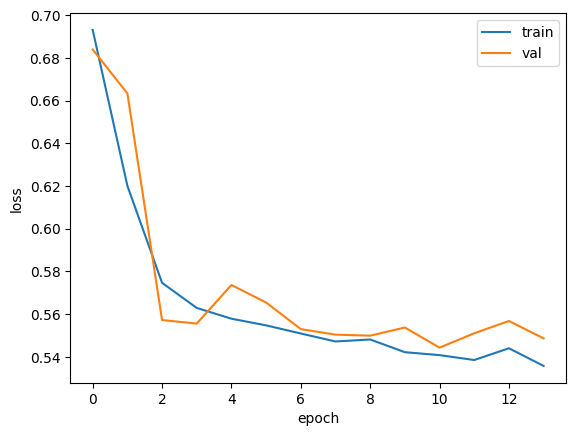

In [113]:
plt.plot(hist.history['loss'], label='train')
plt.plot(hist.history['val_loss'], label='val')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend()
plt.show()

In [114]:
# 단어 임베딩, 지정된 크기 만큼의 실수 밀집 벡터로 변환, 벡터는 유의미한 데이터, 학습을 반복하면서 조정(강사하강법)

(train_input, train_target), (test_input, test_target) =\
    keras.datasets.imdb.load_data(num_words=500)

# 훈련세트, 검증세트
train_input, val_input, train_target, val_target = train_test_split(
    train_input, train_target, test_size=0.2, random_state=42
)

In [115]:
train_seq = pad_sequences(train_input, maxlen=100)
val_seq = pad_sequences(val_input, maxlen=100)

In [116]:
model = keras.Sequential()
model.add(keras.layers.Input(shape=(100,)))
model.add(keras.layers.Embedding(500, 16))
model.add(keras.layers.SimpleRNN(8))
model.add(keras.layers.Dense(1, activation='sigmoid'))

In [117]:
model.summary()

Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_3 (Embedding)         │ (None, 100, 16)        │         8,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ simple_rnn_6 (SimpleRNN)        │ (None, 8)              │           200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 1)              │             9 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 8,209 (32.07 KB)

 Trainable params: 8,209 (32.07 KB)

 Non-trainable params: 0 (0.00 B)

In [118]:
# 옵티마이저, 손실함수, 측정지표
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# 콜백
checkpoint_cb = keras.callbacks.ModelCheckpoint('best-embedding-model.keras',
                                                save_best_only=True)
early_stopping_cb = keras.callbacks.EarlyStopping(patience=3, restore_best_weights=True)

In [119]:
hist = model.fit(train_seq, train_target, epochs=100, 
                 validation_data=(val_seq, val_target), 
                 callbacks=[checkpoint_cb, early_stopping_cb])

Epoch 1/100
625/625 ━━━━━━━━━━━━━━━━━━━━ 7s 8ms/step - accuracy: 0.5687 - loss: 0.6659 - val_accuracy: 0.7230 - val_loss: 0.5602
Epoch 2/100
625/625 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - accuracy: 0.7497 - loss: 0.5201 - val_accuracy: 0.7210 - val_loss: 0.5531
Epoch 3/100
625/625 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - accuracy: 0.7627 - loss: 0.5040 - val_accuracy: 0.7070 - val_loss: 0.5770
Epoch 4/100
625/625 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - accuracy: 0.7893 - loss: 0.4671 - val_accuracy: 0.7772 - val_loss: 0.4883
Epoch 5/100
625/625 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.8047 - loss: 0.4390 - val_accuracy: 0.7754 - val_loss: 0.4800
Epoch 6/100
625/625 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.8150 - loss: 0.4193 - val_accuracy: 0.7660 - val_loss: 0.4842
Epoch 7/100
625/625 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.8283 - loss: 0.4021 - val_accuracy: 0.7776 - val_loss: 0.4740
Epoch 8/100
625/625 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.8206 - loss: 0.4062 - val_accu